In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
pic = plt.imread('1566643919.jpg')

In [4]:
pic_t = pic[:,:,range(3)]

In [220]:
plt.imshow(np.floor_divide(pic_t,4))

In [221]:
plt.imsave("rename.jpg", pic)

In [222]:
im = pic[:,:,[0,1,2]]

In [223]:
def plti(im, **kwargs):
    """
    画图的辅助函数
    """
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off') # 去掉坐标轴
    plt.show() # 弹窗显示图像

参考https://www.jianshu.com/p/6dcb1c1af2a7

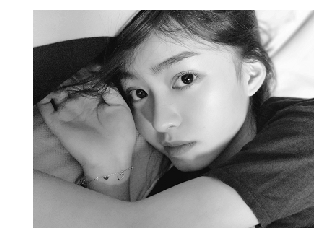

In [574]:
def to_grayscale(im, weights = np.c_[0.2989, 0.5870, 0.1140]):
#def to_grayscale(im, weights = np.c_[0.3,0.3,0.4]):
    """
    取原始图像的RGB值的加权平均来将图片转换为灰阶，权重矩阵为tile
    """
    # 默认的 weights = array([[ 0.2989,  0.587 ,  0.114 ]])
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    # assert( tile.shape == im.shape )
    return np.floor(np.sum(tile * im, axis=2)).astype(np.int)
    # np.sum意味着沿某一轴求和，axis=2为第三维（0为第一维）
    # 整个乘法意味着由图像每个像素点的RGB 得到 (R*0.2989+ G*0.5870+ B*0.1140)灰阶值，图像的二维尺寸不变，而减为单通道。
img = to_grayscale(im)
plti(img, cmap='gray') # 注意要以灰度形式画出

In [5]:
lena = plt.imread('Lena.jpg')

# 灰度收缩

In [6]:
def change_gray(image, grays):
    return np.floor(image / (256 / grays))

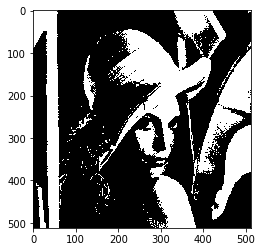

In [7]:
plt.imshow(change_gray(lena,2), cmap='gray')

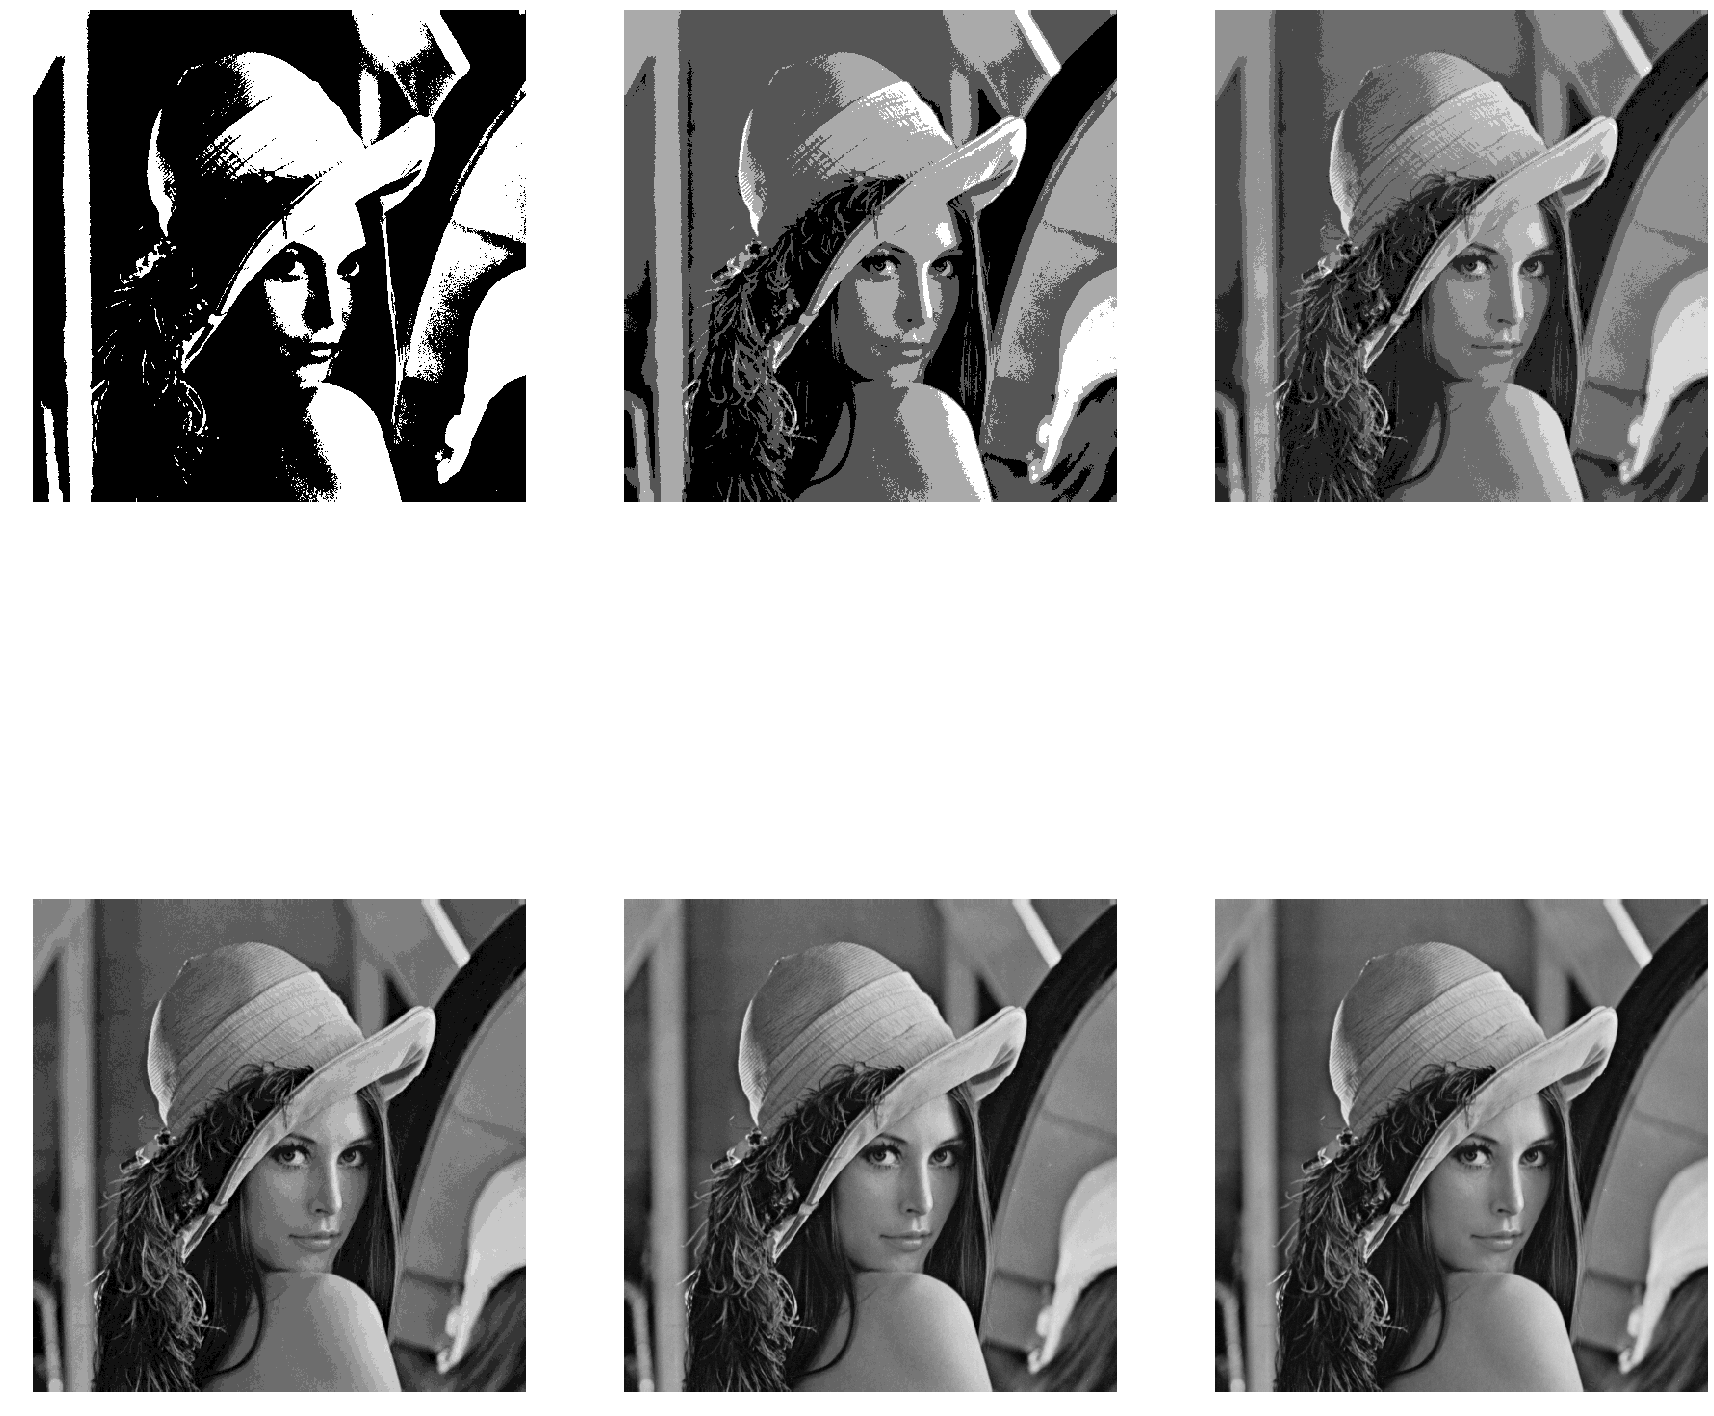

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,30))
axs = axs.flatten()
for i, ax in zip(range(1,7), axs):
    ax.imshow(change_gray(lena, 2**i), cmap='gray', interpolation='none')
    ax.set_axis_off()
plt.show()

# 空间收缩

### 双线性插值法
对于一个目的像素，设置坐标通过反向变换得到的浮点坐标为(i+u,j+v) (其中i、j均为浮点坐标的整数部分，u、v为浮点坐标的小数部分，是取值[0,1)区间的浮点数)，则这个像素得值 f(i+u,j+v) 可由原图像中坐标为 (i,j)、(i+1,j)、(i,j+1)、(i+1,j+1)所对应的周围四个像素的值决定，即：f(i+u,j+v) = (1-u)(1-v)f(i,j) + (1-u)vf(i,j+1) + u(1-v)f(i+1,j) + uvf(i+1,j+1)
其中f(i,j)表示源图像(i,j)处的的像素值，以此类推。 参考https://www.cnblogs.com/bingdaocaihong/p/7003088.html

In [178]:
def my_resize(img,size):
    src_size = img.shape
    # 读图像时shape顺序是列行
    src_w, src_h = src_size
    # 给原图右下边界扩展一行一列,全部赋值0
    img = np.append(img, [[0]*src_w], axis=0)
    img = np.append(img, [[0]]*(src_h+1), axis=1)
    des_h, des_w = size
    new_img = np.zeros(size)
    h_rate, w_rate = float(src_h / des_h), float(src_w / des_w)
    for i in range(des_h):
        for j in range(des_w):
            x_virtual = i * h_rate
            x = int(np.floor(x_virtual))
            u = x_virtual - x
            y_virtual = j * w_rate
            y = int(np.floor(y_virtual))
            v = y_virtual - y
            new_img[i][j] = (1-u)*(1-v)*img[x][y] + u*(1-v)*img[x][y+1] + (1-u)*v*img[x+1][y] + u*v*img[x+1][y+1]
    return new_img

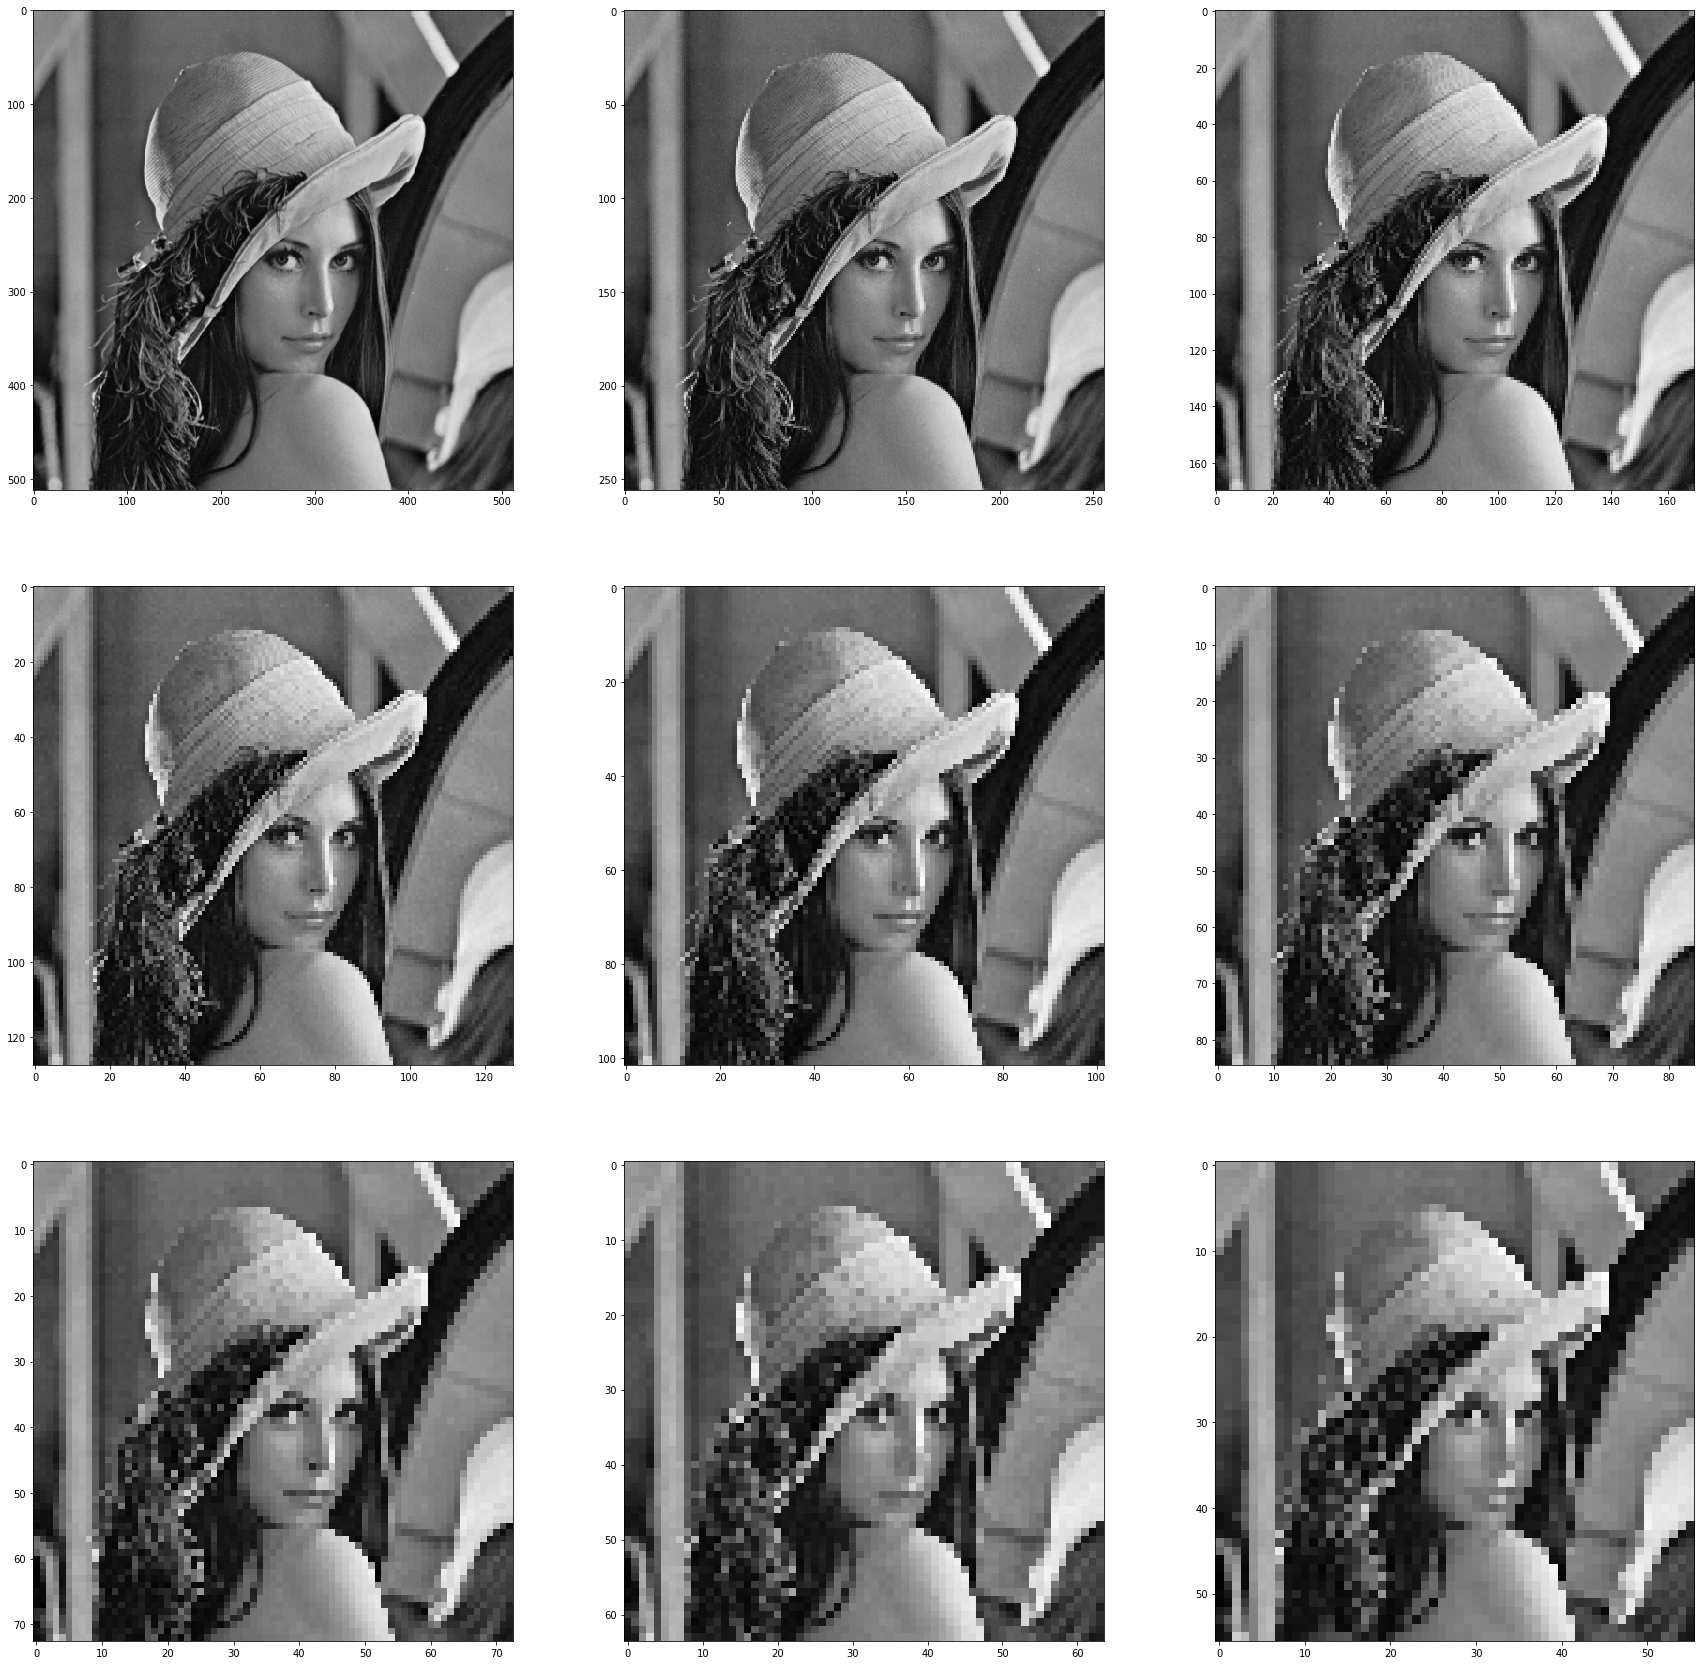

In [210]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30,30))
axs = axs.flatten()
for i, ax in zip(range(1,10), axs):
    ax.imshow(my_resize(lena, (int(lena.shape[1]/i),int(lena.shape[0]/i))), cmap='gray')
    #ax.set_axis_off()
plt.show()

# HW2
直方图均衡

In [289]:
image = plt.imread('20190918230145.png')

In [290]:
image_gray = np.floor(to_grayscale(image[:,:,range(3)])*256)

In [307]:
def equalizeHist(image, grays = 256):
    Nk = [0] * grays
    for i in image.flatten():
        Nk[int(i)] += 1
    Pr = [i/sum(Nk) for i in Nk]
    Sk = []
    tmp = 0
    for i in Pr:
        Sk.append(i + tmp)
        tmp = Sk[-1]
    # 这里grays-1-0是最大灰度减最小灰度，不清楚是数据里的最大值减最小值还是图的格式的最大值减最小值？？？？？
    res = [np.floor(((grays-1)-0)*i+0.5) for i in Sk]
    # 注意这里需要用copy，否则只是浅拷贝，最后还是修改原始数据
    new_img = image.copy()
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            new_img[i][j] = res[int(new_img[i][j])]
    return new_img

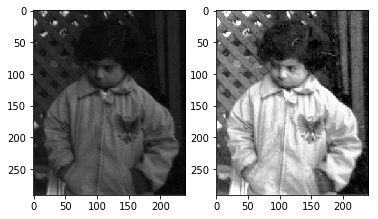

In [308]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(image_gray, cmap='gray')
axs[1].imshow(equalizeHist(image_gray),cmap='gray')

幂次

In [317]:
def power_change(image,c,lamda):
    return np.floor(c*image**lamda)

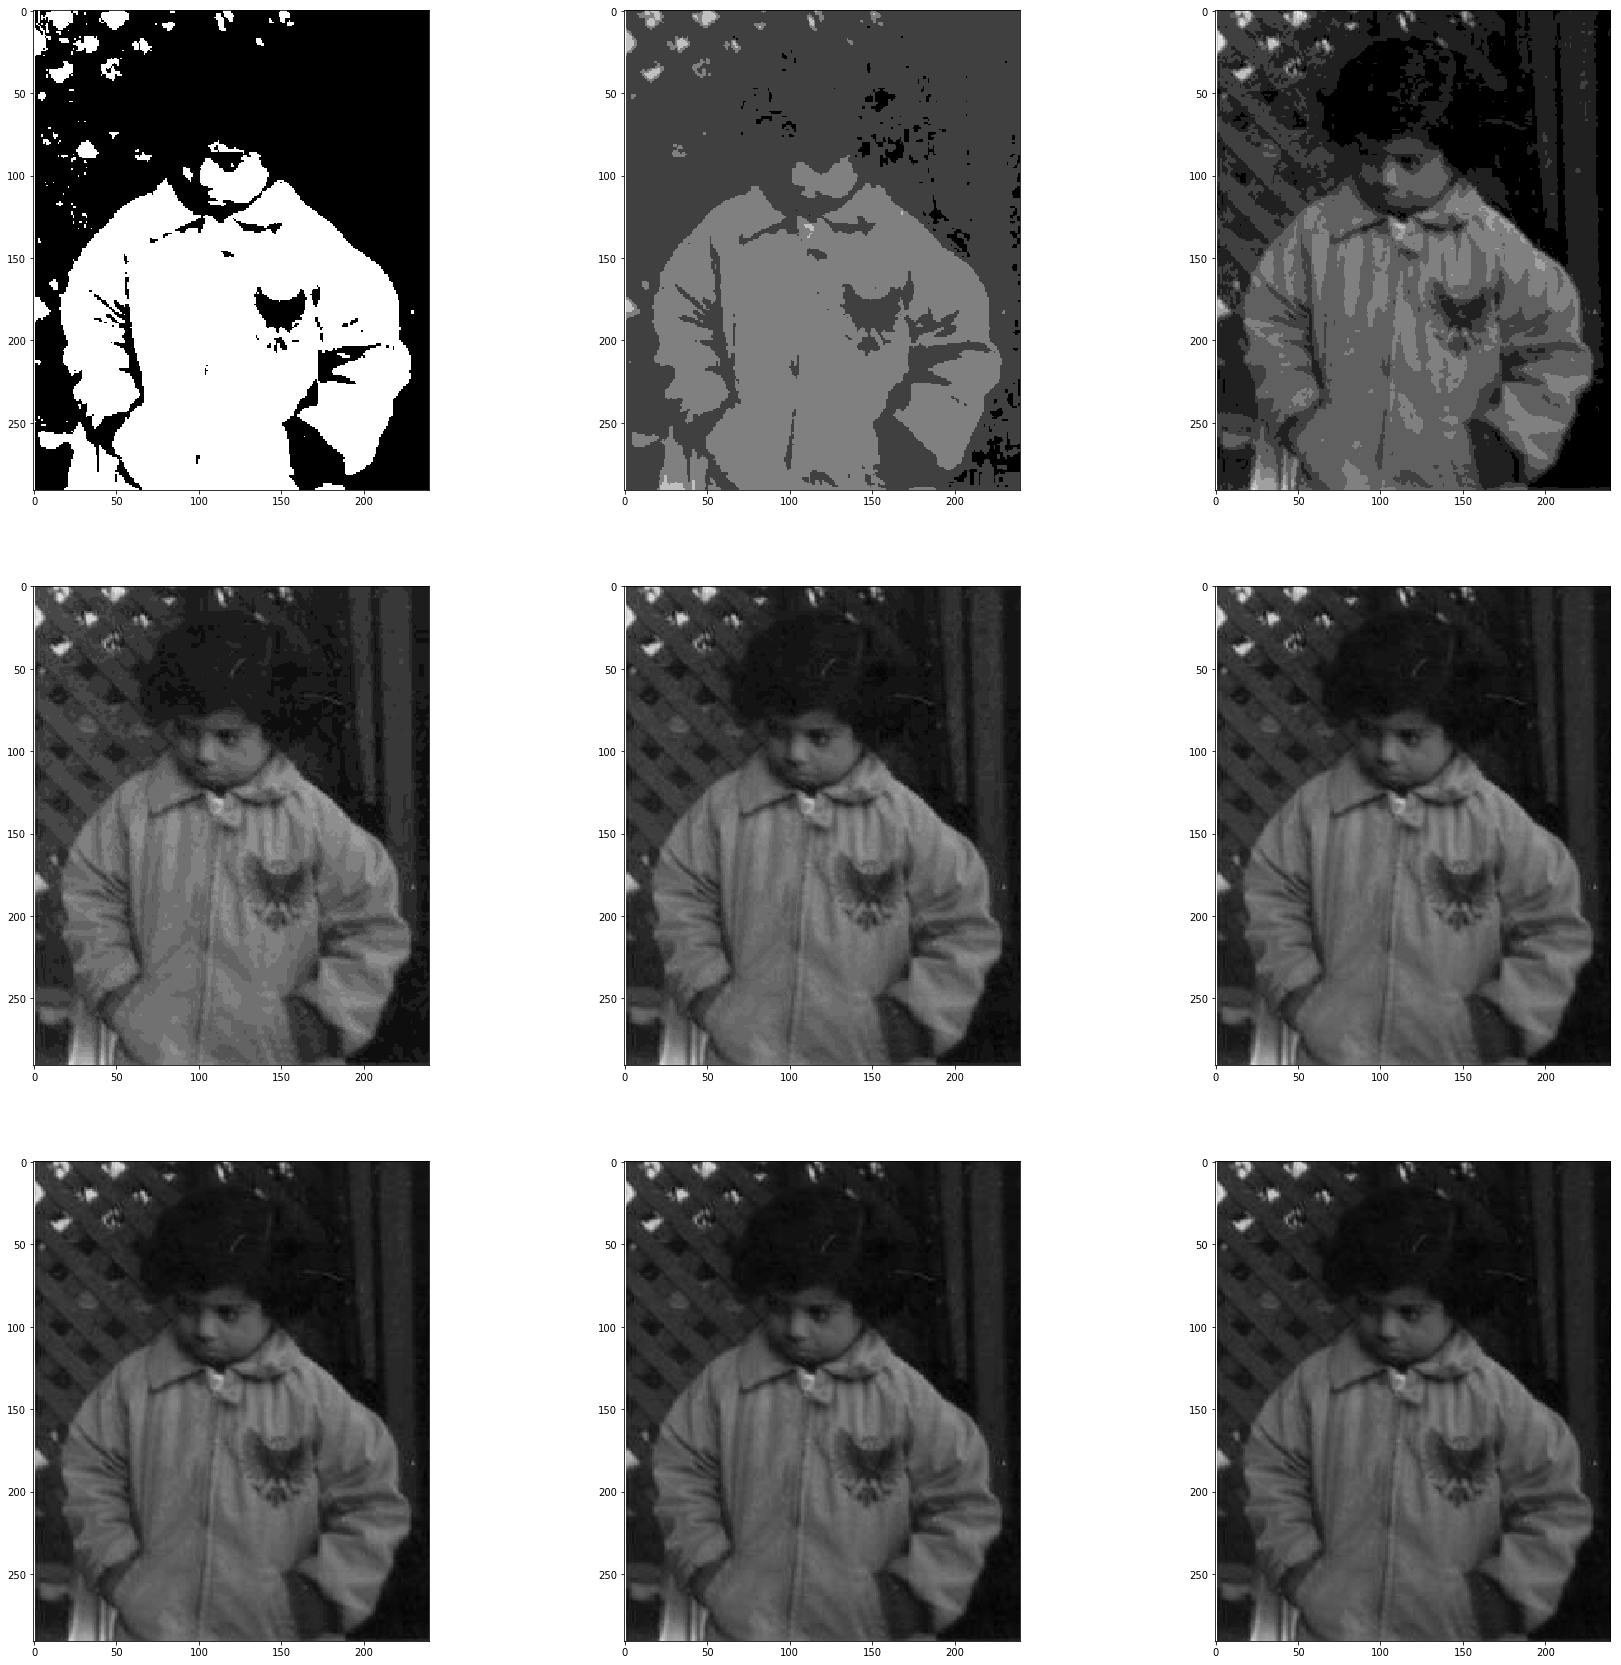

In [321]:
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(30,30))
axs = axs.flatten()
for i, ax in zip(range(1,10),axs):
    ax.imshow(power_change(image_gray,5,i*0.1),cmap='gray')
plt.show()

# HW3
加噪 平滑 锐化

In [381]:
# 加噪
def addNoise(img, rate=0.1):
    size = lena.size
    lenashape = lena.shape
    noise_num = size * 0.1
    img_new = img.copy()
    for i in range(int(noise_num)):
        x, y = np.random.randint(lenashape[0]), np.random.randint(lenashape[1])
        if np.random.randint(2) == 0:
            img_new[x][y] = 255
        else:
            img_new[x][y] = 0
    return img_new

In [14]:
# 添加全零边框
def addZerosFrame(img,m=1,n=1):
    # m, n为边框宽度
    pic_w, pic_h = img.shape
    new_img = np.zeros((pic_w+m*2,pic_h+n*2))
    new_img[m:-m,n:-n] = img
    return new_img

In [470]:
lena_noise = addNoise(lena,2)

中值滤波器平滑

In [471]:
# 中指滤波器 type 有待扩充
def median_filter(img, type='median'):
    new_img = img.copy()
    img_big = addZerosFrame(img)
    width, height = img.shape
    for x in range(width):
        for y in range(height):
            new_img[x][y] = sorted(img_big[x:x+3,y:y+3].flatten())[4]
    return new_img

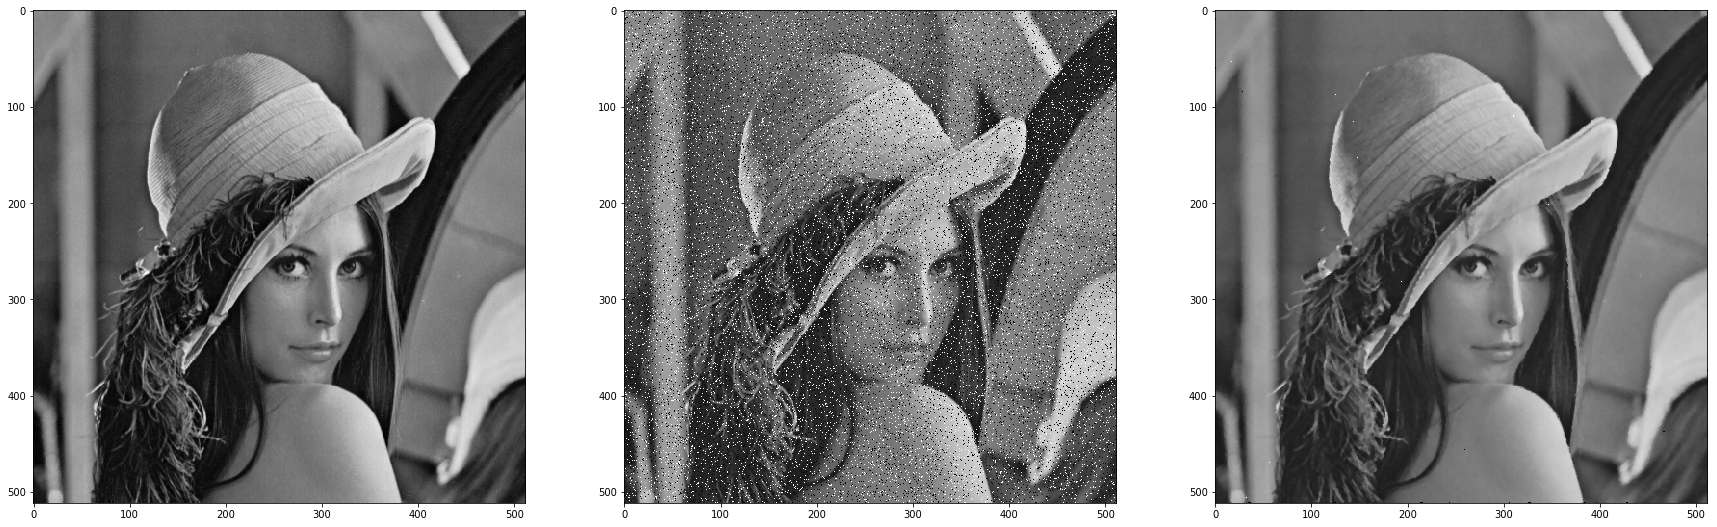

In [472]:
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(30,30))
axs[0].imshow(lena, cmap='gray')
axs[1].imshow(lena_noise, cmap='gray')
axs[2].imshow(median_filter(lena_noise), cmap='gray')

锐化

In [628]:
import math
def sharpening(img, type='Gradient'):
    img_big = addZerosFrame(img)
    new_img = img.copy()
    width, height = img.shape
    for x in range(width):
        for y in range(height):
            if type == 'Gradient':
                # 这里不用255减结果大部分是黑的，why？？？？
                new_img[x][y] = 255 - abs(img_big[x+2][y+1] + img_big[x+1][y+2] -2*img_big[x+1][y+1])
            if type == 'Roberts':
                new_img[x][y] = 255 - abs(sum(img_big[x+1:x+3,y+2])-sum(img_big[x+1:x+3,y+1]))
            if type.split('_')[0] == 'Sobel':
                nHorizontalDifference = 255 - abs(sum(img_big[x+2,y:y+3])+img_big[x+2,y+1]-sum(img_big[x,y:y+3])-img_big[x,y+1])
                nVerticalDifference = 255 - abs(sum(img_big[x:x+3,y+2])+img_big[x+1,y+2]-sum(img_big[x:x+3,y])-img_big[x+1,y])
                if type.split('_')[1] == 'add':
                    #new_img[x][y] = int(math.sqrt(nHorizontalDifference**2 + nVerticalDifference**2))
                    new_img[x,y] = (nHorizontalDifference + nVerticalDifference)/2
                if type.split('_')[1] == 'max':
                    new_img[x,y] = max(nHorizontalDifference, nVerticalDifference)
            if type == 'Laplacian':
                # 直接用的与原图叠加后的结果,且只有中心的为5的结果
                new_img[x,y] = 5*img_big[x+1,y+1]-(img_big[x,y+1]+img_big[x+1,y]+img_big[x+2,y+1]+img_big[x+1,y+2])
        
    return new_img

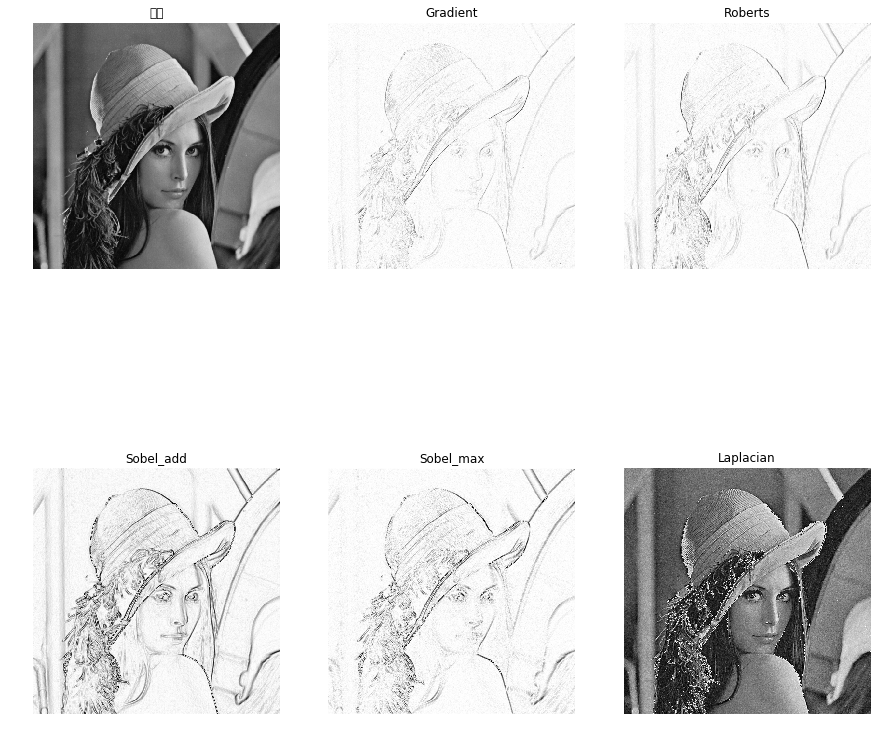

In [639]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,15))
axs = axs.flatten()
filter_type = ['原图','Gradient','Roberts','Sobel_add','Sobel_max','Laplacian']
for i, ax in zip(range(6), axs):
    ax.imshow(sharpening(lena,type=filter_type[i]), cmap='gray', interpolation='none')
    ax.title.set_text(filter_type[i])
    ax.set_axis_off()
plt.show()

# HW4 傅里叶变换 频率域平滑锐化

In [575]:
pic4 = plt.imread('HW4.jpg')[:,:,range(3)]
pic4 = to_grayscale(pic4)

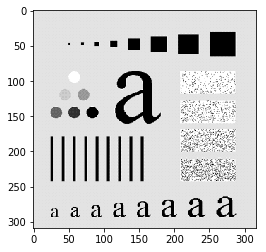

In [845]:
plt.imshow(pic4,cmap='gray')

In [670]:
fft = np.fft.fft2(pic4)

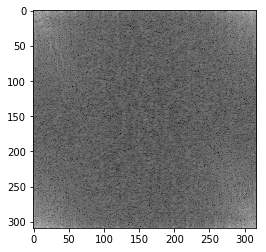

In [671]:
plt.imshow(np.log(np.abs(fft)),cmap='gray')

In [672]:
fft = np.fft.fftshift(fft)

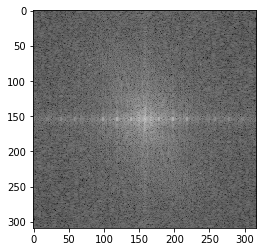

In [673]:
plt.imshow(np.log(np.abs(fft)),cmap='gray')

平滑

In [842]:
def filterSpectrum(img,type='ILPF',D=30,n=2):
    rows, cols = img.shape
    f1 = np.fft.fft2(img)
    f1shift = np.fft.fftshift(f1)
    center = (rows//2,cols//2)
    if type == 'ILPF':
        mask = np.zeros(img.shape)
        mask[rows//2-D:rows//2+D,cols//2-D:cols//2+D] = 1
        f2shift = f1shift * mask
    # B和G代码高度相似，有待简化
    if type == 'BLPF':
        H = np.zeros(img.shape)
        for x in range(rows):
            for y in range(cols):
                Di = math.sqrt((x-center[0])**2+(y-center[1])**2)
                H[x,y] = 1 / (1 + (Di/D)**(2*n))
        f2shift = f1shift * H
    if type == 'GLPF':
        H = np.zeros(img.shape)
        for x in range(rows):
            for y in range(cols):
                Di = math.sqrt((x-center[0])**2+(y-center[1])**2)
                H[x,y] = math.exp(-Di**2/(2*D**2))
        f2shift = f1shift * H
    
    else:
        return
        
    f2 = np.fft.ifftshift(f2shift)
    new_img = np.fft.ifft2(f2)
    new_img = np.abs(new_img)
    new_img = (new_img-np.amin(new_img)) / (np.amax(new_img)-np.amin(new_img))
    return new_img
    

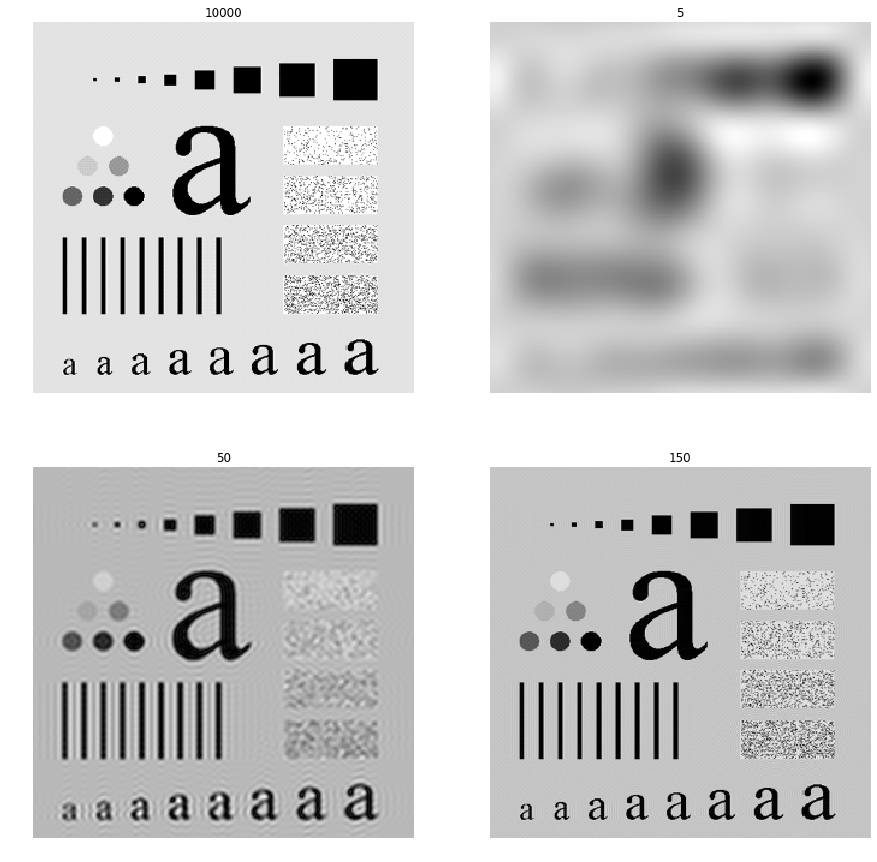

In [918]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axs = axs.flatten()
filter_type = [10000,5,50,150]
for i, ax in zip(range(6), axs):
    ax.imshow(filterSpectrum(pic4,D=filter_type[i],type='ILPF'), cmap='gray', interpolation='none')
    ax.title.set_text(filter_type[i])
    ax.set_axis_off()
plt.show()

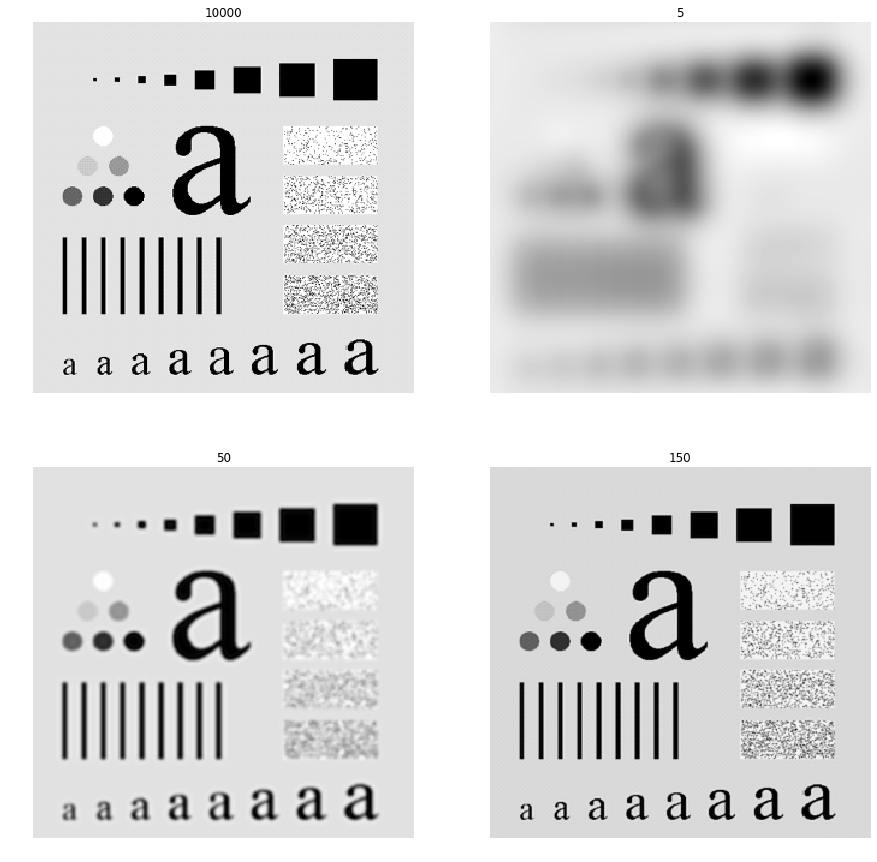

In [914]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axs = axs.flatten()
filter_type = [10000,5,50,150]
for i, ax in zip(range(6), axs):
    ax.imshow(filterSpectrum(pic4,D=filter_type[i],type='BLPF'), cmap='gray', interpolation='none')
    ax.title.set_text(filter_type[i])
    ax.set_axis_off()
plt.show()

In [915]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axs = axs.flatten()
filter_type = [10000,5,50,150]
for i, ax in zip(range(6), axs):
    ax.imshow(filterSpectrum(pic4,D=filter_type[i],type='GLPF'), cmap='gray', interpolation='none')
    ax.title.set_text(filter_type[i])
    ax.set_axis_off()
plt.show()

锐化

In [906]:
def filterSpectrumSharp(img,type='ILPF',D=30,n=2):
    rows, cols = img.shape
    f1 = np.fft.fft2(img)
    f1shift = np.fft.fftshift(f1)
    center = (rows/2,cols/2)
    #global f2shift
    if type == 'ILPF':
        mask = np.ones(img.shape)
        mask[rows//2-D:rows//2+D,cols//2-D:cols//2+D] = 0
        f2shift = f1shift * mask
    # B和G代码高度相似，有待简化
    if type == 'BLPF':
        H = np.zeros(img.shape)
        for x in range(rows):
            for y in range(cols):
                Di = math.sqrt((x-center[0])**2+(y-center[1])**2)
                H[x,y] = 1 / (1 + (D/Di)**(2*n))
        f2shift = f1shift * H
    if type == 'GLPF':
        H = np.zeros(img.shape)
        for x in range(rows):
            for y in range(cols):
                Di = math.sqrt((x-center[0])**2+(y-center[1])**2)
                H[x,y] = 1 - math.exp(-Di**2/(2*D**2))
        f2shift = f1shift * H
        
    f2 = np.fft.ifftshift(f2shift)
    new_img = np.fft.ifft2(f2)
    new_img = np.abs(new_img)
    new_img = (new_img-np.amin(new_img)) / (np.amax(new_img)-np.amin(new_img))
    return new_img

In [917]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
filter_type = [5,50,120]
type_list = ['ILPF','BLPF','GLPF']
for i,typel in enumerate(type_list):
    for j, ax in zip(range(3), axs[i]):
        ax.imshow(filterSpectrumSharp(pic4,D=filter_type[j],type=typel), cmap='gray', interpolation='none')
        ax.title.set_text(str(filter_type[j])+' '+typel)
        ax.set_axis_off()
    
plt.show()

# HW5 对一副图像加噪，进行几何均值，算术均值，谐波，逆谐波处理

https://blog.csdn.net/chicken3wings/article/details/100985820

In [9]:
import skimage
from skimage import util

In [10]:
lena_gaussian = util.random_noise(lena, mode='gaussian')
lena_salt_pepper = util.random_noise(lena, mode='s&p')
# 均匀噪声（均值mean方差variance），out=image+n*image
lena_speckle = util.random_noise(lena, mode='speckle')

算术均值滤波器 几何均值滤波 谐波，逆谐波

In [11]:
# 连乘有没有更好的方式
def listMul(array):
    res = 1
    for i in array:
        res *= i
    return res
def filterRestoration(img, m=3, n=3, type='RithmeticMean', Q=1):
    # 添加像素值为0的框的宽度
    # 做卷积都是奇数应该不会出现不能整除的情况
    M, N = (m-1)//2, (n-1)//2
    img_add = addZerosFrame(img, M, N)
    new_img = img.copy()
    width, height = img.shape
    for x in range(width):
        for y in range(height):
            if type == 'RithmeticMean':
                new_img[x, y] = np.sum(img[x:x+m, y:y+n])/(m*n)
            elif type == 'Geomean':
                # 如果不float会导致整数溢出（以前听说python是不会有溢出这回事的啊）
                new_img[x, y] = listMul(np.float16(img[x:x+m, y:y+n]).flatten()) ** (1/(m*n))
            elif type == 'Harmonic':
                # 这里像素点为0时会出现1/0的情况 ？？？？？
                new_img[x, y] = (m*n)/np.sum(1/(img[x:x+m, y:y+n]+0.0000000000000000001))
            elif type == 'InverseHarmonic':
                new_img[x, y] = np.sum(img[x:x+m, y:y+n]**(Q+1))/np.sum(img[x:x+m, y:y+n]**Q)
    return new_img

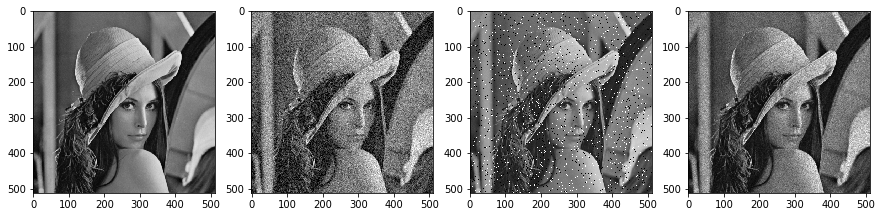

In [12]:
# 加噪
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
axs[0].imshow(lena, cmap='gray')
axs[1].imshow(lena_gaussian, cmap='gray')
axs[2].imshow(lena_salt_pepper, cmap='gray')
axs[3].imshow(lena_speckle, cmap='gray')    
plt.show()

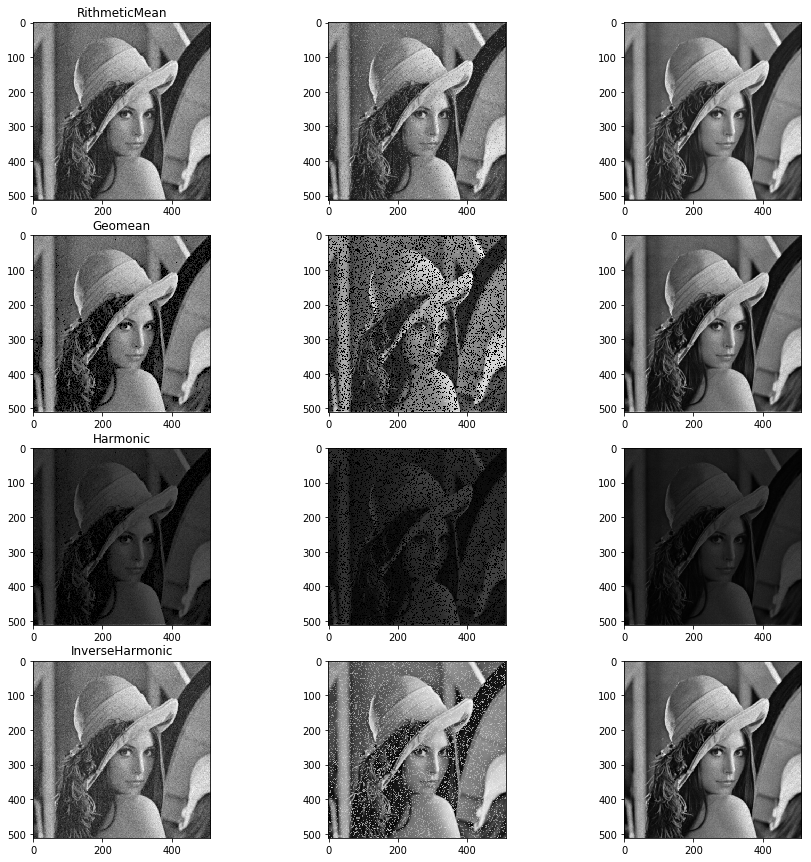

In [15]:
# 滤波
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
type_list = ['RithmeticMean', 'Geomean', 'Harmonic', 'InverseHarmonic']
for i, typel in enumerate(type_list):
    axs[i][0].imshow(filterRestoration(lena_gaussian,type=typel), cmap='gray')
    axs[i][0].title.set_text(typel)
    axs[i][1].imshow(filterRestoration(lena_salt_pepper,type=typel), cmap='gray')
    axs[i][2].imshow(filterRestoration(lena_speckle,type=typel), cmap='gray')
plt.show()

# HW6 提取一副彩色图像中红色，用HIS模型处理

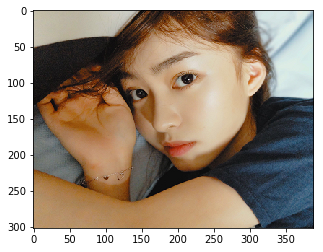

In [18]:
plt.imshow(pic_t)

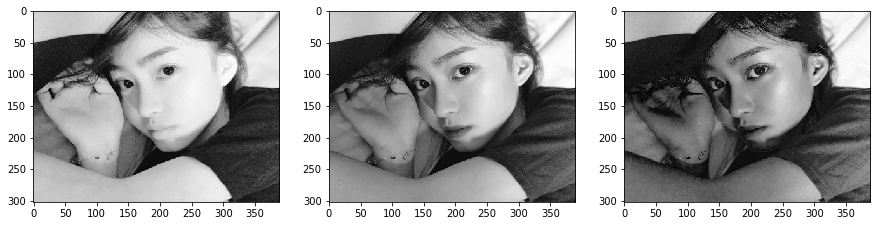

In [117]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    axs[i].imshow(pic_t[:,:,i], cmap='gray')

https://blog.csdn.net/qq_30091945/article/details/78236347

In [244]:
def RGB2HSI(img):
    # 默认的uint8取值范围为256，虽然对np.sum没有影响，但是求取H的时候不能用sum函数，两个颜色相加灰度值会超过256，最后得到的是循环回去的值
    img = img.astype('uint16')
    # 归一化，否则arccos计算会有超出(-1,1)之间产生错误
    img = img / 255.0
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    I = np.sum(img, axis=2)/3
    # 这里是1- 还是I- 需要看书确认一下？？？？？？？？？？？？？？？？？
    S = 1 - ((3/np.sum(img, axis=2))*np.min(img, axis=2))
    # 避免分母为零加个偏移值
    H = np.arccos( ((2*R-G-B)/2) / (((R-G)**2 + (R-B)*(G-B))**0.5 + 0.000000000001)  )
    # arccos 求出的值为角度相对pi后的值，角度=theta*180/pi，所以360则为2*pi
    # H的值基于G和B还有一个变换,G>=B时不变，G<B时2pi-H
    one = np.ones(R.shape)
    tempB = temp * 2 * np.pi
    tempA = (G>=B) * (one + 1) -1
    H = H * tempA + tempB
    # H要不要变换成角度？？？？？？应该不用，因为后面用cos变回来的时候输入数字也不是角度，也是pi的倍数
    
    H, S, I = H[:,:,np.newaxis], S[:,:,np.newaxis], I[:,:,np.newaxis]
    HS = np.append(H, S, axis=2)
    HSI = np.append(HS, I, axis=2)
    return HSI

In [245]:
pic_t_hsi = RGB2HSI(pic_t)

In [212]:
180*math.acos(0.5)//math.pi

60.0

In [272]:
def HSI2RGB(img):
    H, S, I = img[:,:,0], img[:,:,1], img[:,:,2]
    RGB = np.zeros(img.shape)
    w, h = img.shape[:2]
    for i in range(w):
        for j in range(h):
            H, S, I = img[i,j]
            if H>=0 and H < 2*np.pi/3:
                B = I * (1-S)
                R = I * (1 + S*np.cos(H)/np.cos((np.pi/3)-H))
                G = 3 * I - R - B
            elif H>= 2*np.pi/3 and H < 4*np.pi/3:
                H = H - 2*np.pi/3
                R = I * (1-S)
                G = I * (1 + S*np.cos(H)/np.cos((np.pi/3)-H))
                B = 3 * I - R - G
            elif H>= 4*np.pi/3 and H < 2*np.pi:
                H = H - 4*np.pi/3
                G = I * (1-S)
                B = I * (1 + S*np.cos(H)/np.cos((np.pi/3)-H))
                R = 3 * I - B - G
            RGB[i,j] = np.array([R, G, B])
    return RGB                

In [274]:
pic_ori = HSI2RGB(pic_t_hsi)

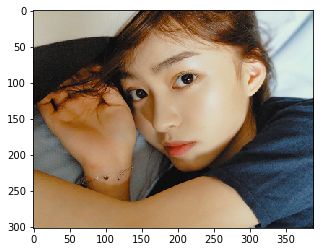

In [275]:
plt.imshow(pic_ori)

# HW7  对一副二值图像进行膨胀、腐蚀、开、闭操作